# Personal Project
### Author: Francesco Napoli

## Riassunto:  Leonardo Merda Secca SEMPRE!



In [1]:
library(dplyr)
library(ggplot2)
#install.packages("gridExtra", repos='http://cran.us.r-project.org')
library(gridExtra)
#install.packages("glmnet", repos='http://cran.us.r-project.org')
library(glmnet)
#install.packages("h2o", repos='http://cran.us.r-project.org')
library(h2o)
#install.packages("stringr", repos='http://cran.us.r-project.org')
library(stringr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.0-2
Warning message:
"package 'h2o' was built under R version 3.6.3"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

-----------

In [2]:
data<-read.csv("summer-products-with-rating-and-performance_2020-08.csv",
               stringsAsFactors=FALSE)


In [3]:
head(data,2)

title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,16,14,EUR,100,0,3.76,54,26,...,568,4.128521,595097d6a26f6e070cb878d1,0,,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae51d43d6a96e303acdb0-medium.jpg,5e9ae51d43d6a96e303acdb0,summer,2020-08
SSHOUSE Summer Casual Sleeveless SoirÃ©e Party SoirÃ©e sans manches VÃªtements de plage sexy Mini robe femme wshC1612242400387A21,Women's Casual Summer Sleeveless Sexy Mini Dress,8,22,EUR,20000,1,3.45,6135,2269,...,17752,3.899673,56458aa03a698c35c9050988,0,,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940d436a0d3d5da4e95a38-medium.jpg,58940d436a0d3d5da4e95a38,summer,2020-08


#### It is important to visualize the data before deciding about which variable would be interesting to keep and which is not.

In [4]:
table(data$urgency_text)


                                               QuantitÃ© limitÃ©e ! 
                             1100                               472 
RÃ©duction sur les achats en gros 
                                1 

#### I start with the column "urgency_text". Using the table() function, I was able to understand how the different obs.
#### are divided.
#### I decide to transform the urgency text "Quantité limitée!" into a factor variable.

In [5]:
data$urgency_text<-ifelse(data$urgency_text=="Quantité limitée !",1,0)
table(data$urgency_text)
data$urgency_text<-as.factor(data$urgency_text)
str(data$urgency_text)


   0 
1573 

 Factor w/ 1 level "0": 1 1 1 1 1 1 1 1 1 1 ...


#### "Merchant_info_subtitle" variable gives interesting information about the vendor info, the positive feedback
#### I'm gonna try to store these info into a factor variable


In [6]:
head(data$merchant_info_subtitle,5)

[1] "(568 notes)"                       "83 % avis positifs (17,752 notes)"
[3] "86 % avis positifs (295 notes)"    "(23,832 notes)"                   
[5] "85 % avis positifs (14,482 notes)"

Warning message in base::as.numeric(x):
"si è prodotto un NA per coercizione"

infodata
  0  33  53  56  59  61  65  67  68  70  71  73  74  75  76  77  78  79  80  81 
348   1   2   1   1   1   2   1   2   4   4  10   3   9   7  10  10  26  39  53 
 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97 100 
 73  85 102 130 135 107 104  92  70  63  30  21  13  10   1   1   2 

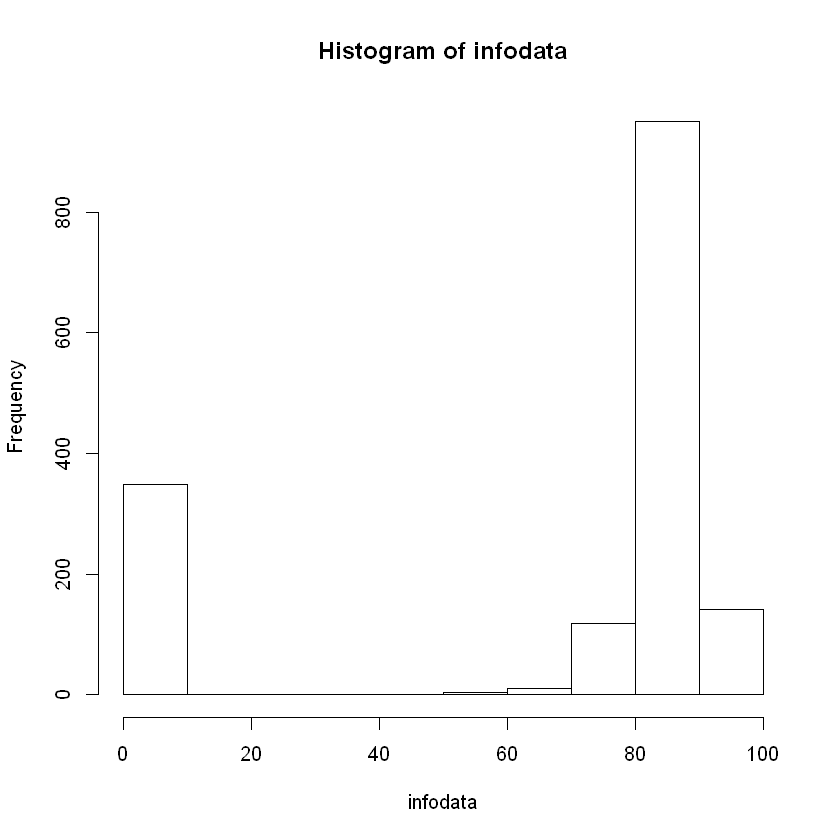

In [7]:
info<-strsplit(data$merchant_info_subtitle," ")
infodata=list()
for (i in 1:length(info)){
  test=unlist(info[i])
  test=test[1]
  
  if (length(test)<=2){
    infodata[i]=test
  }
  if (length(test)>2){
    infodata[i]=0
  }
}
infodata=unlist(infodata)
infodata=as.numeric(infodata)
infodata<-ifelse(is.na(infodata),0,infodata)
table(infodata)
hist(infodata)

In [8]:
summary(infodata)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   76.00   84.00   66.51   88.00  100.00 

#### I consider the feedback major or equal at 85% as a rule to define  "good_seller" dummy variable
#### I still keep the numeric value (in percentage) of the positive feedback

In [9]:
goodseller<-ifelse(infodata>=85,1,0)
goodseller<-ifelse(is.na(goodseller),0,goodseller)
infodata<-ifelse(is.na(infodata),0,infodata)
goodseller<-as.factor(goodseller)

data$merchant_info_subtitle<-infodata
data$goodseller<-goodseller

cor(data$merchant_info_subtitle,data$units_sold) #It seems like there is a low correlation between the units sold and
                                                #the positive feedback of the seller



[1] 0.03826723

### Merchant rating

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.900   4.000   4.033   4.200   5.000 

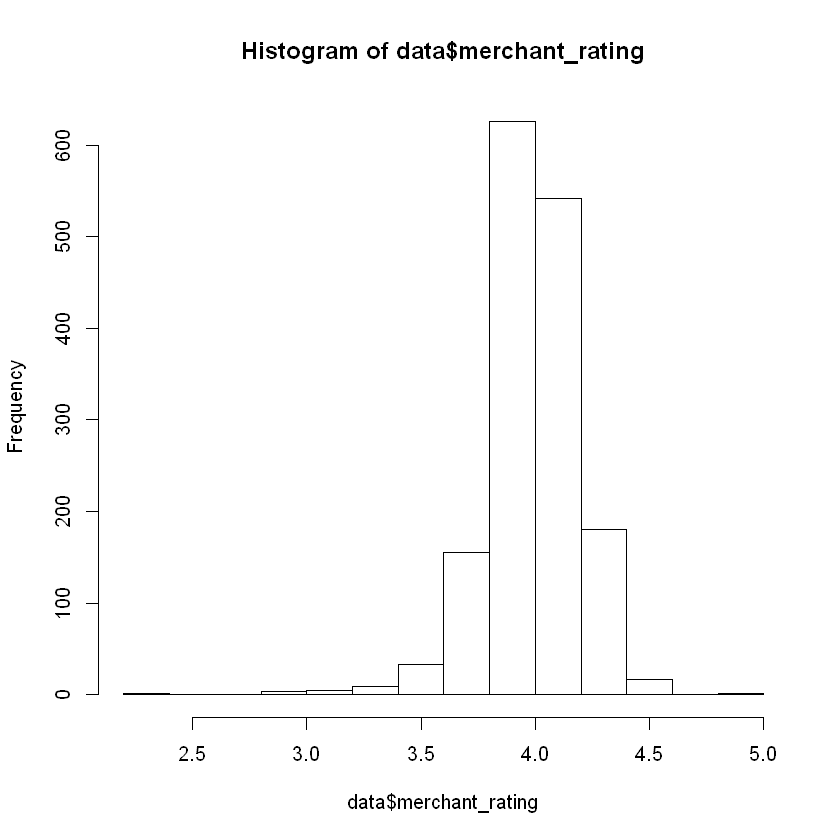

In [10]:
data$merchant_rating<-round(data$merchant_rating,digits=1) #I rounded the rating to make easier the comparison
hist(data$merchant_rating)
summary(data$merchant_rating)

In [11]:
print(cor(data$merchant_rating,data$units_sold)) # it seems it can be found a low correlation between the merchant_rating and
                                         # the units sold

[1] 0.1203762


### Rating count

Summary of the data$merchant_rating_count

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1987    7936   26496   24564 2174765 

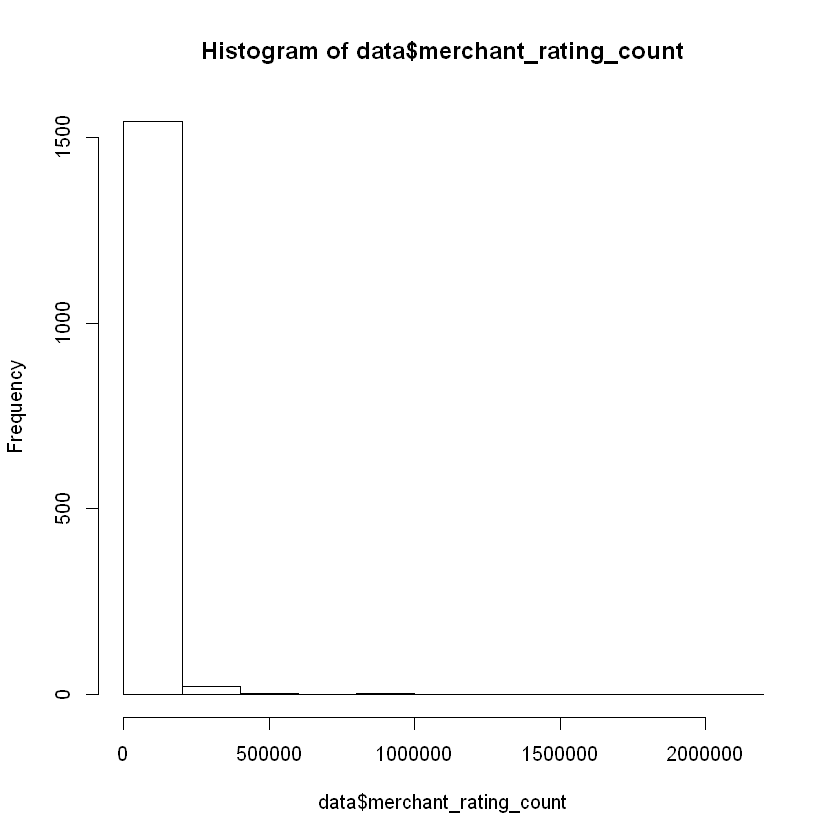

In [12]:
hist(data$merchant_rating_count)
cat("Summary of the data$merchant_rating_count")
summary(data$merchant_rating_count)

In [13]:
cat("Correlation data$merchant_rating_count and data$units_sold =")
cor(data$merchant_rating_count,data$units_sold) #Medium correlation
cat("Correlation data$merchant_rating_count and data$merchant_rating =")
cor(data$merchant_rating_count,data$merchant_rating) #Low correlation 

Correlation data$merchant_rating_count and data$units_sold =

[1] 0.2728973

Correlation data$merchant_rating_count and data$merchant_rating =

[1] 0.1348091

### Merchant_ID

In [14]:
cat("In the dataset the unique number of merchant_id is:")
length(unique(data$merchant_id)) #there are some merchant who are duplicates
                                #Should I do something to remove the duplicates in the ratings??? Not sure

cat("In the dataset the duplicated number of merchant_id is:")
sum(duplicated(data$merchant_id)*1)

cat("Check sum:")
length(unique(data$merchant_id))+sum(duplicated(data$merchant_id)*1)

In the dataset the unique number of merchant_id is:

[1] 958

In the dataset the duplicated number of merchant_id is:

[1] 615

Check sum:

[1] 1573

#### I decided to create a dummy variable to understand if there is a relation between units_sold and the higher presence in the dataset for the duplicates 

In [15]:
more_than_one_article<-as.factor(duplicated(data$merchant_id)*1)
data$more_than_one_article<-more_than_one_article 

### Title

#### I should consider the possibility that there are some duplicates.
##### (I'll consider just the variable title)

In [16]:
cat("The code show that the number of unique title is:")
length(unique(data$title))
data$title<-tolower(data$title) #Removing Caps Lock

The code show that the number of unique title is:

[1] 1201

#### It could be interesting to see if there is a relation between the title and the units_sold. It could be that a specific title may increase the units_sold variable

In [17]:
repeated_title<-as.factor(duplicated(data$title)*1)
data$repeated_title<-repeated_title 

#### In order to understand if there are dupllicates, I'm gonna check if there are matches between the titles and the id. If I find some matches, It means that I'm watching a duplicate. 

In [18]:
duplicati<-as.matrix(duplicated(data$title)*1)
numbermatch=list()
count=0
for (i in 1:length(duplicati)){
  if (duplicati[i]==1){
    count=count+1
    numbermatch[count]=i
  }
  
}
     
numbermatch<-c(unlist(numbermatch)) #I create the a vector with the rows who present some duplicates

cat("Title duplicates are present in the dataset rows:")
numbermatch

Title duplicates are present in the dataset rows:

[1]   63   68   92   96   99  123  141  154  163  180  193  204  212  227  228
 [16]  267  268  274  288  297  302  310  312  315  317  333  341  342  344  355
 [31]  358  363  364  380  386  407  412  415  416  420  421  424  429  436  443
 [46]  445  448  455  459  465  466  483  484  489  491  497  498  505  506  515
 [61]  519  520  528  533  547  552  555  556  562  569  570  571  572  574  576
 [76]  577  581  582  598  599  619  621  633  634  639  640  650  653  655  656
 [91]  660  671  677  679  680  681  682  684  685  687  688  689  690  699  701
[106]  702  708  713  715  716  723  726  728  733  737  740  742  745  747  752
[121]  757  760  762  770  771  773  781  792  794  801  805  806  812  814  818
[136]  819  825  828  830  833  847  858  863  864  882  885  890  891  899  900
[151]  908  909  915  916  922  923  925  926  929  930  932  935  937  939  943
[166]  947  956  960  963  967  969  980  984  987  988  992  997  998 1000 1002
[181] 1004 1005 1025 1029 1033 1040 1042 1043 1044 1049 1051 1053 1060 1061 1063
[196] 1069 1072 1075 1080 1081 1084 1088 1090 1094 1095 1100 1104 1106 1110 1112
[211] 1114 1118 1121 1122 1127 1132 1133 1134 1135 1137 1139 1146 1148 1149 1162
[226] 1167 1168 1172 1174 1175 1178 1180 1182 1198 1200 1208 1209 1210 1213 1220
[241] 1222 1224 1229 1230 1233 1234 1240 1241 1242 1243 1244 1245 1246 1247 1248
[256] 1252 1253 1254 1255 1258 1259 1263 1264 1266 1267 1268 1270 1271 1272 1274
[271] 1277 1281 1283 1284 1289 1290 1293 1296 1298 1310 1317 1318 1319 1320 1321
[286] 1322 1325 1332 1336 1344 1345 1346 1347 1348 1349 1356 1359 1361 1364 1366
[301] 1370 1373 1374 1375 1383 1384 1388 1390 1398 1402 1404 1406 1411 1412 1417
[316] 1422 1424 1426 1434 1435 1437 1439 1440 1443 1444 1445 1446 1447 1451 1452
[331] 1455 1456 1459 1460 1462 1478 1479 1480 1482 1487 1490 1492 1494 1496 1499
[346] 1500 1502 1511 1513 1514 1515 1518 1519 1521 1523 1527 1529 1531 1537 1541
[361] 1544 1545 1547 1548 1552 1554 1557 1560 1563 1567 1570 1572

In [19]:
matchid=list()
count=0

for (i in 1:length(numbermatch)){
  match<-match(data[numbermatch[i],36],data$merchant_id)
  
  if (length(match)>=2){
    count=count+1
    matchid[count]=match
  }
}
cat("The number of matches is: ")
print(unlist(matchid))
cat("
The code show that there are not duplicates in tile and merchant_id.
Suggesting that there are merchants who sell more than one object in the dataset.")

The number of matches is: NULL

The code show that there are not duplicates in tile and merchant_id.
Suggesting that there are merchants who sell more than one object in the dataset.

### Tags

#### Creation of the number of tags variable

In [20]:
data$tags<-tolower(data$tags)
num_tags<-lengths(strsplit(data$tags," "))
data$num_tags<-num_tags
cat("The correlation between the num_tags and units_sold variables is:")
cor(data$num_tags,data$units_sold) #low correlation 


The correlation between the num_tags and units_sold variables is:

[1] 0.04439117

#### Creation of the most used tag

In [21]:
tags<-unlist(strsplit(data$tags," "))
tags<-unlist(strsplit(tags,","))
tags<-as.matrix(table(tags))
print(head(tags,10))

             [,1]
#crop           7
#fashion        4
#shorts         1
#sport          2
#summer         1
#top            7
#tshirt         3
&             168
2               2
2014menshort    1


In [22]:
summary(tags)

       V1         
 Min.   :   1.00  
 1st Qu.:   1.00  
 Median :   1.00  
 Mean   :  17.98  
 3rd Qu.:   3.00  
 Max.   :2810.00  

In [23]:
tags<-ifelse(tags<=300,NA,tags)
tagsOVER<-na.omit(tags)
tagsOVER<-unique(tagsOVER)
print(head(tagsOVER,10))

cat("
With this code, I wanted to reduce the tags vector created focusing on the most used tags.

The number of these tags is: ")
cat(length(tagsOVER))

        [,1]
beach    593
casual  1221
cotton   313
dress   2721
dresses  326
fashion 2810
floral   333
loose    341
mini     343
pants    496

With this code, I wanted to reduce the tags vector created focusing on the most used tags.

The number of these tags is: 27

In [24]:
detect<-row.names(tagsOVER)[which.max(tagsOVER)]

cat("With this code, I've found the most used tags in the dataset, which is: ")
cat(detect)

With this code, I've found the most used tags in the dataset, which is: fashion

In [25]:
tag_most_used<-as.factor(str_detect(data$tags, detect)*1)
data$tag_most_used<-tag_most_used

cat("I create a dummy variable to understand if the presence of the most used tag could be relevant to increase the units_sold")

I create a dummy variable to understand if the presence of the most used tag could be relevant to increase the units_sold

### Total Inventory

#### I want to analyse the variable inventory_total. And I have find out that this variable is not very useful.

In [26]:
table(data$inventory_total) 
paste0(cat("Basically "),cat(1563/length(data$inventory_total)), cat(" percent of the observations are equal to 50."))


   1    2    9   24   30   36   37   38   40   50 
   1    2    1    1    1    1    1    1    1 1563 

Basically 0.9936427 percent of the observations are equal to 50.

character(0)

### Merchant Profile picture

#### I'll analyse the merchant_has_profile_picture column.

In [27]:
table(data$merchant_has_profile_picture)
cat("The table shows that the variable should be considered as a factor")

paste0(cat("Additionally, the importance of the variable is given by the high correlation, which is equal to: "),cat(cor(data$merchant_has_profile_picture,data$units_sold))) #interesting correlation 


   0    1 
1347  226 

The table shows that the variable should be considered as a factorAdditionally, the importance of the variable is given by the high correlation, which is equal to: 0.1435291

character(0)

In [28]:
data$merchant_has_profile_picture<-as.factor(data$merchant_has_profile_picture)

### Color 

#### I'll analyse the color column with the intent to find some color which may increase the variable units_sold.

First of all, since I'm considering chr data, I have to be sure to remove Caps Lock.

In [30]:
data$product_color<-tolower(data$product_color)
table(data$product_color)
tablecol<-as.matrix(table(data$product_color))


                             applegreen             apricot                army 
                 41                   2                   2                   1 
         army green           armygreen               beige               black 
                  3                  31                  14                 305 
       black & blue       black & green      black & stripe       black & white 
                  2                   4                   1                   3 
     black & yellow          blackwhite                blue         blue & pink 
                  2                   1                 100                   1 
              brown      brown & yellow            burgundy               camel 
                  7                   1                   2                   2 
         camouflage              claret              coffee           coolblack 
                  3                   1                   7                   2 
           coralred        

In [33]:
detect<-row.names(tablecol)[which.max(tablecol)]
paste0(cat("The code detect which color is the mose used in the dataset. In this case, the color is "),cat(detect))

The code detect which color is the mose used in the dataset. In this case, the color is black

character(0)

In [34]:
black<-c(str_which(row.names(tablecol), "black"))

black<-as.data.frame(tablecol[black,1])
sum(black)

color_black<-ifelse(str_detect(data$product_color, "black"),1,0)
sum(color_black) #Check that the code is able to recognize all the black color (also the mixed one)
color_black<-as.numeric(color_black) #factorize the variable black

[1] 325

[1] 325

In [36]:
cor(color_black,data$units_sold)

[1] 0.04862973

In [37]:
summary(data$units_sold)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     100    1000    4339    5000  100000 

### SIZE

In [40]:
data$product_variation_size_id<-tolower(data$product_variation_size_id)
data$product_variation_size_id<-gsub(pattern='.',replacement='',
                                          x=data$product_variation_size_id,fixed=TRUE)

In [45]:
data$product_variation_size_id = gsub(pattern='(size-*)|(size)',replacement='',
                                          x=data$product_variation_size_id)
data$product_variation_size_id = gsub(pattern='.+[-]',replacement='',
                                          x=data$product_variation_size_id)
data$product_variation_size_id = ifelse(grepl(pattern='xl',data$product_variation_size_id),
                                            'xl',data$product_variation_size_id)
data$product_variation_size_id = ifelse(grepl(pattern='xs',data$product_variation_size_id),
                                            'xs',data$product_variation_size_id)

data$product_variation_size_id = str_replace(data$product_variation_size_id,' ','')

data$product_variation_size_id = ifelse(data$product_variation_size_id %in% c('s','xs','m','l','xl'),
                                            data$product_variation_size_id,'NotClear')

In [46]:
table(data$product_variation_size_id)


       l        m NotClear        s       xl       xs 
      54      206       90      684       57      482 

In [ ]:
factor